In [ ]:
# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc

In [4]:
# READ DATA
data = pd.read_csv("C:\\Users\\kumar\\DATA.csv")

In [3]:
#DATA PREPARATION
data.head(10)

NameError: name 'data' is not defined

In [32]:
data.shape

(284807, 31)

In [34]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [35]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [37]:
data.isnull().values.sum()

0

In [38]:
#CHECK MISSING DATA
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [39]:
data.duplicated(keep=False).sum()

1854

In [40]:
data["Class"].describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

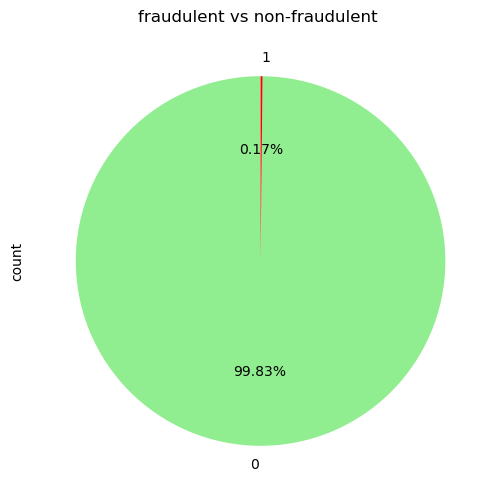

Class
0    284315
1       492
Name: count, dtype: int64


In [71]:
plt.title('fraudulent vs non-fraudulent ')
data['Class'].value_counts().plot(kind='pie', autopct="%.2f%%", 
                                        startangle = 90, colors = ['lightgreen','red'], figsize=(6,6))
plt.show();
print(data.Class.value_counts())

In [46]:
# DETERMINE NUMBER OF VALID,FRAUD
valid = len(data[data['Class'] == 0])
fraud = len(data[data['Class'] == 1])

Outlier_Fraction = (fraud/(valid+fraud)) * 100

print('The outlier fraction is :' , Outlier_Fraction) 
print('The valid transactions are :'  , valid ) 
print('The fraud transactions are :'  , fraud )

The outlier fraction is : 0.1727485630620034
The valid transactions are : 284315
The fraud transactions are : 492


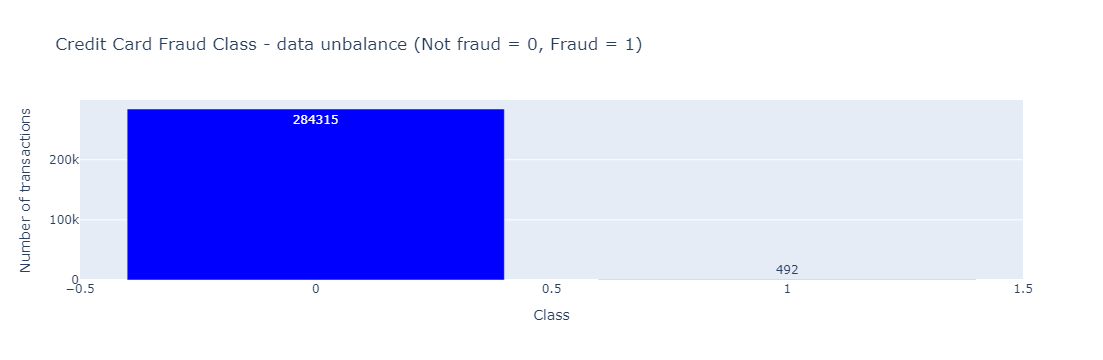

In [51]:
# DATA UNBALENCE
temp = data["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df['Class'],y = df['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="blue"),
    text=df['values']
)
data_df = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data_df, layout=layout)
iplot(fig, filename='class')

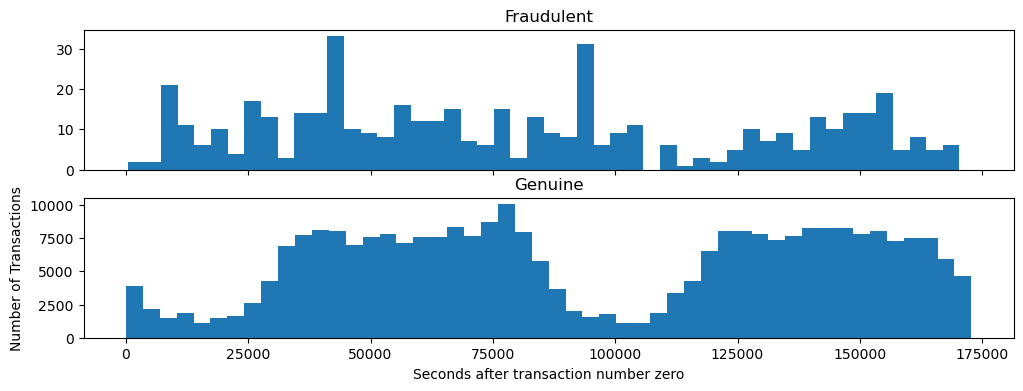

In [52]:
#Histrogram for feature Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(data["Time"][data["Class"] == 1], bins = 50)
ax1.set_title('Fraudulent')

ax2.hist(data["Time"][data["Class"] == 0], bins = 50)
ax2.set_title('Genuine')

plt.xlabel('Seconds after transaction number zero')
plt.ylabel('Number of Transactions')
plt.show()

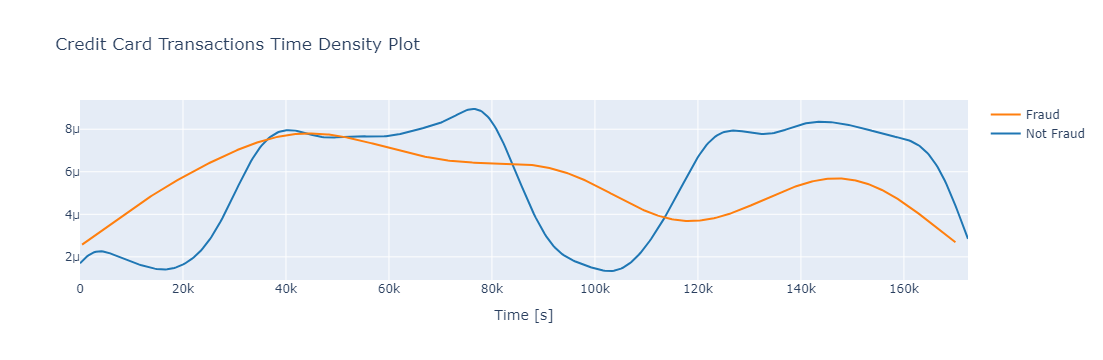

In [53]:
# DATA EXPLORATION
class_0 = data.loc[data['Class'] == 0]["Time"]
class_1 = data.loc[data['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

In [55]:
data['Hour'] = data['Time'].apply(lambda x: np.floor(x / 3600))

tmp = data.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


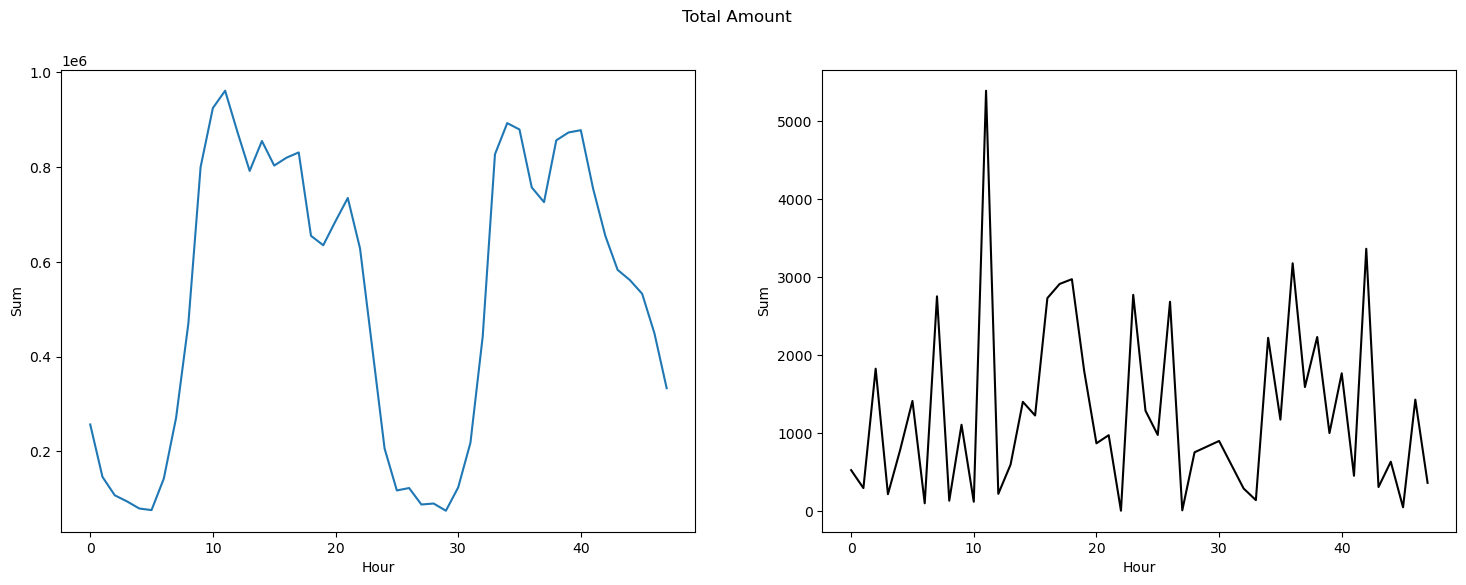

In [56]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="black")
plt.suptitle("Total Amount")
plt.show();

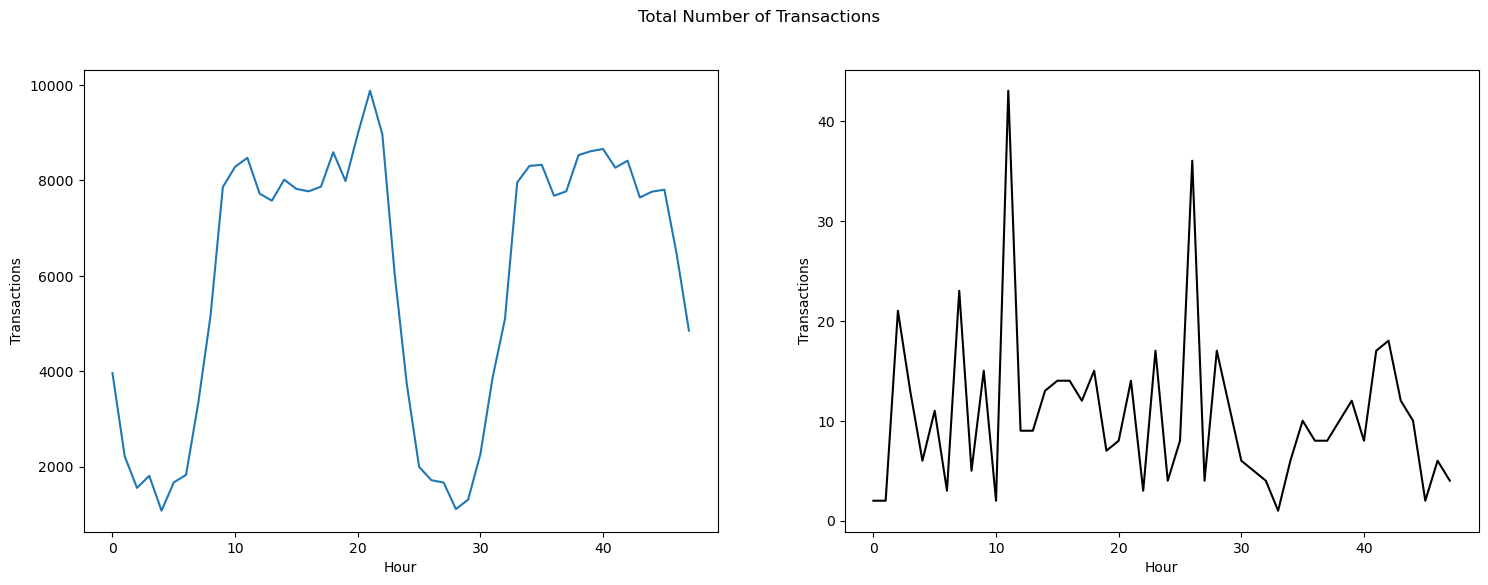

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="black")
plt.suptitle("Total Number of Transactions")
plt.show();

In [58]:
# TRANSACTIONS AMOUNT
tmp = data[['Amount','Class']].copy()
Genuine = tmp.loc[tmp['Class'] == 0]['Amount']
Fraudulent= tmp.loc[tmp['Class'] == 1]['Amount']
Genuine.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [59]:
Fraudulent.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

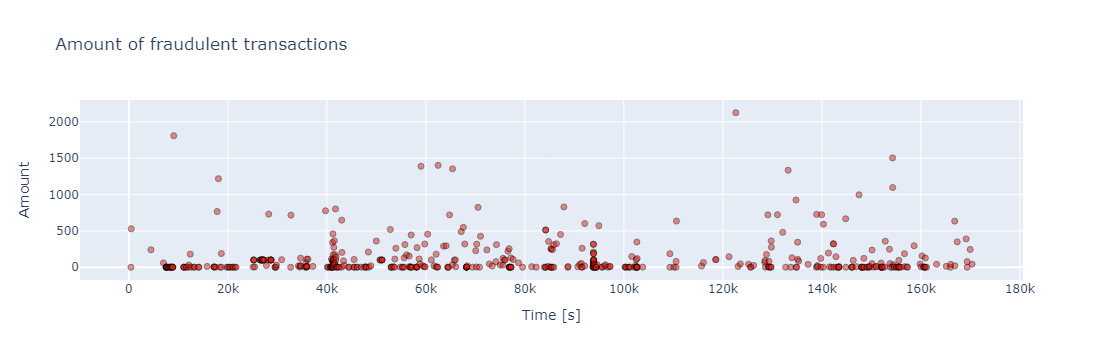

In [60]:
fraud = data.loc[data['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data_df = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data_df, layout=layout)
iplot(fig, filename='fraud-amount')

In [61]:
# PREDICTIVE MODELS
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [62]:
x = data.drop("Class", axis = 1)
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,47.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,47.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,47.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,47.0


In [68]:
y = data.Class
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [69]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.25,random_state=41,stratify = y)

NameError: name 'train_test_split' is not defined

In [65]:
xtrain.shape

NameError: name 'xtrain' is not defined

In [28]:
xtest.shape

(71202, 31)

In [29]:
xtest.value_counts()
xtrain.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
176906,122961.0,-2.837937,3.182838,-3.168326,-1.323905,-0.472270,-1.421590,-0.314061,1.952207,-0.490837,...,0.351420,0.785237,0.118477,0.778316,0.036138,0.069120,0.283304,0.251796,2.23,34.0
240498,150626.0,2.056985,0.214861,-2.547511,0.293377,0.823107,-1.137775,0.524482,-0.231397,-0.089621,...,0.045789,0.095894,0.064366,0.612435,0.152926,0.570162,-0.116814,-0.058047,9.06,41.0
196407,131491.0,2.107217,-0.113591,-1.542073,0.220187,0.176512,-0.903322,0.110924,-0.265816,0.828292,...,0.211136,0.743523,-0.061144,-0.650658,0.292050,-0.055212,-0.020195,-0.066832,1.00,36.0
238592,149736.0,-3.289955,0.453362,0.163803,4.751908,0.679158,0.340379,1.058224,-0.599138,0.140306,...,-0.565133,1.011587,0.720396,-0.063529,-0.293254,0.304650,-1.538022,-0.881503,49.92,41.0
158364,111141.0,2.103279,-0.009427,-1.450142,0.333582,0.301341,-0.744963,-0.015309,-0.288635,2.238840,...,0.081604,0.573325,0.005145,0.403033,0.325933,-0.471336,-0.031387,-0.058751,1.00,30.0


In [30]:
RANDOM_STATE = 2018
VERBOSE_EVAL = 50
VALID_SIZE = 0.20 
TEST_SIZE = 0.20

In [31]:
train_df, test_df = train_test_split(data, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_xtrain = scaler.fit_transform(xtrain)
scaled_xtest = scaler.fit_transform(xtest)
scaled_xtrain

array([[ 0.59366284, -1.45022406,  1.93198024, ...,  0.77561127,
        -0.3452102 ,  0.61939554],
       [ 1.17594307,  1.05320914,  0.128753  , ..., -0.1779328 ,
        -0.31779618,  1.15005499],
       [ 0.77319837,  1.07889945, -0.07080154, ..., -0.20496797,
        -0.35014713,  0.77101253],
       ...,
       [-1.40080216,  0.67155194,  0.39033193, ...,  0.12735839,
        -0.35014713, -1.42743376],
       [-1.39777132, -0.61326145,  0.2166623 , ...,  0.47176804,
        -0.34396593, -1.42743376],
       [ 0.25915427,  0.95414929,  0.20823803, ..., -0.12048384,
        -0.34199918,  0.24035308]])

In [33]:
scaled_xtest

array([[ 1.03454155,  1.02769354, -0.58565216, ..., -0.12148574,
        -0.0560757 ,  1.07139092],
       [-1.84310126,  0.59516446,  0.1627106 , ...,  0.07341158,
        -0.20823294, -1.81489908],
       [-1.31759665, -1.43116185,  1.52521647, ..., -2.72005215,
         0.00514289, -1.28321408],
       ...,
       [-0.88119458,  0.6311531 , -0.1849965 , ...,  0.03402226,
        -0.31098848, -0.90343908],
       [ 1.4751404 ,  1.11947847,  0.13204528, ..., -0.3041617 ,
        -0.34260557,  1.45116593],
       [ 0.80844255,  1.01199888, -0.05716895, ..., -0.20195563,
        -0.33276475,  0.84352592]])

In [34]:
scaled_xtrain3d = scaled_xtrain.reshape(scaled_xtrain.shape[0],scaled_xtrain.shape[1],1)
scaled_xtest3d = scaled_xtest.reshape(scaled_xtest.shape[0],scaled_xtest.shape[1],1)

scaled_xtrain3d.shape, scaled_xtest3d.shape

((213605, 31, 1), (71202, 31, 1))

In [35]:
n_inputs = scaled_xtrain3d.shape[1]

In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
Model2.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(scaled_xtrain3d, ytrain, validation_data=(scaled_xtest3d, ytest), batch_size=700, epochs=50, callbacks=[es], shuffle=True, verbose=2)
print(his_mod2.history.keys())

Epoch 1/50
306/306 - 3s - loss: 0.0484 - accuracy: 0.9907 - val_loss: 0.0098 - val_accuracy: 0.9989 - 3s/epoch - 11ms/step
Epoch 2/50
306/306 - 2s - loss: 0.0111 - accuracy: 0.9987 - val_loss: 0.0078 - val_accuracy: 0.9993 - 2s/epoch - 6ms/step
Epoch 3/50
306/306 - 2s - loss: 0.0069 - accuracy: 0.9991 - val_loss: 0.0068 - val_accuracy: 0.9993 - 2s/epoch - 7ms/step
Epoch 4/50
306/306 - 2s - loss: 0.0066 - accuracy: 0.9991 - val_loss: 0.0055 - val_accuracy: 0.9993 - 2s/epoch - 5ms/step
Epoch 5/50
306/306 - 1s - loss: 0.0056 - accuracy: 0.9991 - val_loss: 0.0050 - val_accuracy: 0.9993 - 1s/epoch - 5ms/step
Epoch 6/50
306/306 - 2s - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0047 - val_accuracy: 0.9993 - 2s/epoch - 5ms/step
Epoch 7/50
306/306 - 2s - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.0048 - val_accuracy: 0.9993 - 2s/epoch - 6ms/step
Epoch 8/50
306/306 - 2s - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9993 - 2s/epoch - 5ms/step
Epoch 9/50
306/306 - 2s

In [37]:
Y_pred = Model2.predict(scaled_xtest3d).ravel()
cm =confusion_matrix(ytest, Y_pred.round())

2226/2226 [==============================] - 2s 1ms/step


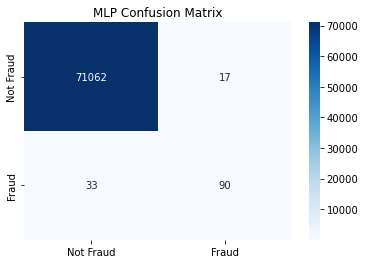

In [38]:
sns.heatmap(cm, xticklabels=['Not Fraud', 'Fraud'],yticklabels=['Not Fraud', 'Fraud'], annot=True, fmt="d",cmap = "Blues")
plt.title("MLP Confusion Matrix")
plt.show()

In [39]:
Y_pred = Model2.predict(scaled_xtest3d).ravel()
accuracy_score(ytest, Y_pred.round())
precision, recall, fscore, support = score(ytest, Y_pred.round())
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

2226/2226 [==============================] - 4s 2ms/step
precision: [0.99953583 0.8411215 ]
recall: [0.99976083 0.73170732]
fscore: [0.99964832 0.7826087 ]
support: [71079   123]


2226/2226 [==============================] - 3s 1ms/step


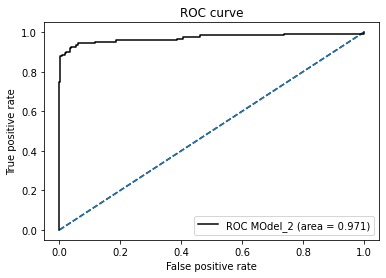

In [40]:
Y_pred = Model2.predict(scaled_xtest3d).ravel()
fpr_model1, tpr_model1, thresholds_model1 = roc_curve(ytest, Y_pred, pos_label=1)
auc_model1 = roc_auc_score(ytest, Y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_model1, tpr_model1, label='ROC MOdel_2 (area = {:.3f})'.format(auc_model1),color="black")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

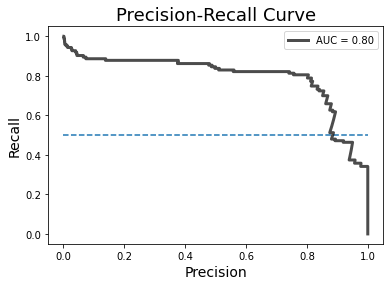

In [41]:
precision, recall, thresholds_pr = precision_recall_curve(ytest, Y_pred)
AUC_PRcurve= auc(recall, precision)
plt.figure(1)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(precision, recall, label = "AUC = {:0.2f}".format(AUC_PRcurve), lw = 3, alpha = 0.7,color="black")
plt.xlabel('Precision', fontsize = 14)
plt.ylabel('Recall', fontsize = 14)
plt.title('Precision-Recall Curve', fontsize = 18)
plt.legend(loc='best')
plt.show()

In [42]:
 int(Model2.predict([[122961.0,-2.837937,3.182838,-3.168326,-1.323905,-0.472270,-1.421590,-0.314061,1.952207,-0.490837,0.351420,3.182838,-3.168326,-1.323905,-0.472270,-1.421590,-0.314061,1.952207,-0.490837,0.351420,0.785237,0.118477,0.778316,0.036138,0.069120,0.283304,0.251796,0.283304,0.251796,2.23,34.0]]))

1/1 [==============================] - 0s 86ms/step


0